In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import spacy
import string
import math

In [2]:
#SPLITTING THE DATA 90-10 ratio

In [3]:
rawdata = pd.read_csv('rawdata.csv')

In [5]:
total_size=len(rawdata)
train_size=math.floor(0.90*total_size)

In [6]:
train=rawdata.head(train_size)
test=rawdata.tail(len(rawdata) -train_size)

In [7]:
train.to_csv('raw_train.csv')
test.to_csv('raw_test.csv')

In [ ]:
#PREPROCESSING

In [4]:
comments_train = pd.read_csv('raw_train.csv')
comments_train

,Unnamed: 0,Comment,Language,Sentiment
0,0,CURVES GRADES hehehehe,en,1
1,1,masters the lesson perfectly.,en,1
2,2,She is very terror but she teaches very well!,en,1
3,3,"Unenthusiastic, can barely understand what is ...",en,-1
4,4,not applicable,en,0
...,...,...,...,...
660,660,Malimit siyang magtanong kaya bagsak ang maram...,tlen,-1
661,661,"tas in our first quiz, multiple choice kaso wa...",tlen,-1
662,662,Lagi niya sineset ang mood sa classroom ambiance,tlen,1
663,663,Malabo magbigay ng mga requirements,tlen,-1


In [5]:
comments_test = pd.read_csv('raw_test.csv')
comments_test

,Unnamed: 0,Comment,Language,Sentiment
0,665,binabasa lang niya ang powerpoint.,tlen,-1
1,666,Chill and laid back style of teaching. Maayos ...,tlen,1
2,667,"He said, ""we are the cod fish, he's the whale....",en,1
3,668,Punctual professor. Gives importance and rewar...,en,1
4,669,Her jokes are sometimes funny and sometimes not,en,0
...,...,...,...,...
69,734,She treats her students like her children.,en,1
70,735,No comment,en,0
71,736,Always overtime,en,-1
72,737,Good atmosphere for learning. Helped us unders...,en,1


In [6]:
#CONVERT TO LOWERCASE

In [7]:
comments_train["Comment"]= comments_train["Comment"].str.lower()
comments_train

,Unnamed: 0,Comment,Language,Sentiment
0,0,curves grades hehehehe,en,1
1,1,masters the lesson perfectly.,en,1
2,2,she is very terror but she teaches very well!,en,1
3,3,"unenthusiastic, can barely understand what is ...",en,-1
4,4,not applicable,en,0
...,...,...,...,...
660,660,malimit siyang magtanong kaya bagsak ang maram...,tlen,-1
661,661,"tas in our first quiz, multiple choice kaso wa...",tlen,-1
662,662,lagi niya sineset ang mood sa classroom ambiance,tlen,1
663,663,malabo magbigay ng mga requirements,tlen,-1


In [8]:
comments_test["Comment"]= comments_test["Comment"].str.lower()
comments_test

,Unnamed: 0,Comment,Language,Sentiment
0,665,binabasa lang niya ang powerpoint.,tlen,-1
1,666,chill and laid back style of teaching. maayos ...,tlen,1
2,667,"he said, ""we are the cod fish, he's the whale....",en,1
3,668,punctual professor. gives importance and rewar...,en,1
4,669,her jokes are sometimes funny and sometimes not,en,0
...,...,...,...,...
69,734,she treats her students like her children.,en,1
70,735,no comment,en,0
71,736,always overtime,en,-1
72,737,good atmosphere for learning. helped us unders...,en,1


In [9]:
#REMOVE NUMBERS

In [10]:
comments_train['Comment'] = comments_train['Comment'].str.replace('\d+', '', regex=True)
comments_train

,Unnamed: 0,Comment,Language,Sentiment
0,0,curves grades hehehehe,en,1
1,1,masters the lesson perfectly.,en,1
2,2,she is very terror but she teaches very well!,en,1
3,3,"unenthusiastic, can barely understand what is ...",en,-1
4,4,not applicable,en,0
...,...,...,...,...
660,660,malimit siyang magtanong kaya bagsak ang maram...,tlen,-1
661,661,"tas in our first quiz, multiple choice kaso wa...",tlen,-1
662,662,lagi niya sineset ang mood sa classroom ambiance,tlen,1
663,663,malabo magbigay ng mga requirements,tlen,-1


In [11]:
comments_test['Comment'] = comments_test['Comment'].str.replace('\d+', '', regex=True)
comments_test

,Unnamed: 0,Comment,Language,Sentiment
0,665,binabasa lang niya ang powerpoint.,tlen,-1
1,666,chill and laid back style of teaching. maayos ...,tlen,1
2,667,"he said, ""we are the cod fish, he's the whale....",en,1
3,668,punctual professor. gives importance and rewar...,en,1
4,669,her jokes are sometimes funny and sometimes not,en,0
...,...,...,...,...
69,734,she treats her students like her children.,en,1
70,735,no comment,en,0
71,736,always overtime,en,-1
72,737,good atmosphere for learning. helped us unders...,en,1


In [12]:
#CONVERT EMOTICONS TO STRING LABELS

In [13]:
comments_train['Comment'] = comments_train['Comment'].str.replace(":\)", "qwertyuiop", regex=True)
comments_train['Comment'] = comments_train['Comment'].str.replace(":\(", "asdfghjkl", regex=True)

In [14]:
comments_test['Comment'] = comments_test['Comment'].str.replace(":\)", "qwertyuiop", regex=True)
comments_test['Comment'] = comments_test['Comment'].str.replace(":\(", "asdfghjkl", regex=True)

In [15]:
#REMOVE PUNCTATIONS

In [16]:
comments_train['Comment'] = comments_train['Comment'].str.replace('[^\w\s]','', regex=True)
comments_test['Comment'] = comments_test['Comment'].str.replace('[^\w\s]','', regex=True)

In [17]:
#CONVERT STRING LABELS BACK TO EMOTICONS

In [18]:
comments_train['Comment'] = comments_train['Comment'].str.replace("qwertyuiop", ":)", regex=True)
comments_train['Comment'] = comments_train['Comment'].str.replace("asdfghjkl", ":(", regex=True)

In [19]:
comments_test['Comment'] = comments_test['Comment'].str.replace("qwertyuiop", ":)", regex=True)
comments_test['Comment'] = comments_test['Comment'].str.replace("asdfghjkl", ":(", regex=True)

In [ ]:
#REMOVE STOPWORDS
#nltk.download_shell()

In [24]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giorgio\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [25]:
en_stop_nltk = set(stopwords.words('english'))
from spacy.lang.en.stop_words import STOP_WORDS as en_STOP_WORDS
from spacy.lang.tl.stop_words import STOP_WORDS as tl_STOP_WORDS

temp = en_stop_nltk.union(en_STOP_WORDS)
temp = temp.union(tl_STOP_WORDS)
temp

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'ain',
 'akin',
 'aking',
 'ako',
 'alin',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amin',
 'aming',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'ang',
 'ano',
 'another',
 'anumang',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apat',
 'are',
 'aren',
 "aren't",
 'around',
 'as',
 'at',
 'atin',
 'ating',
 'ay',
 'bababa',
 'back',
 'bago',
 'bakit',
 'bawat',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bilang',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'couldn',
 "couldn't",
 'd',
 'dahil',
 'dalawa',
 'dapat',
 'did',
 'didn',
 "didn't",
 'din',
 'dito',
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 '

In [26]:
valid_stopwords = {'against','although',"aren't",'but','cannot','couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'don',"don't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'hindi','however','isn',"isn't",'least','mahusay','mightn',"mightn't",'mustn', "mustn't", 'needn',"needn't",'neither','never','nevertheless','no','nobody','none', 'nor','not','shan',"shan't",'shouldn',"shouldn't",'walang', 'wasn',"wasn't",'weren', "weren't",'well','won',"won't",'wouldn',"wouldn't",'yet'}
stopwords_all = [word for word in temp if word not in valid_stopwords]
stopwords_all = list(stopwords_all)
stopwords_all

['go',
 've',
 'just',
 'moreover',
 'become',
 'before',
 'onto',
 'became',
 'either',
 'such',
 'did',
 'top',
 'beyond',
 'yourself',
 'with',
 'dapat',
 'makita',
 's',
 'together',
 'next',
 'six',
 'having',
 'here',
 'three',
 'nabanggit',
 'akin',
 'anywhere',
 'becomes',
 'muli',
 'elsewhere',
 'where',
 'd',
 'anything',
 'first',
 'done',
 'indeed',
 'again',
 'ours',
 'until',
 'pamamagitan',
 'really',
 'thereafter',
 'kumuha',
 'hence',
 'marami',
 'kailangan',
 'serious',
 "'m",
 'kaya',
 'likod',
 'whereafter',
 'whither',
 'have',
 'maaaring',
 "that'll",
 'why',
 'anyone',
 'sixty',
 "'ve",
 'both',
 'doing',
 '‘m',
 'unless',
 'nagkaroon',
 'beside',
 'themselves',
 'due',
 'ang',
 'perhaps',
 'bilang',
 'tulad',
 'myself',
 'sometimes',
 'among',
 'ca',
 'alin',
 'off',
 'becoming',
 'kanino',
 'besides',
 'over',
 'or',
 'upon',
 'bago',
 'o',
 'dalawa',
 'during',
 'what',
 'ginawa',
 'seem',
 'saan',
 'herein',
 'be',
 'her',
 'by',
 'between',
 'same',
 "should

In [27]:
comments_train['Comment'] = comments_train['Comment'].apply(lambda x:' '.join([word for word in x.split() if word not in stopwords_all]))
comments_train

,Unnamed: 0,Comment,Language,Sentiment
0,0,curves grades hehehehe,en,1
1,1,masters lesson perfectly,en,1
2,2,terror but teaches well,en,1
3,3,unenthusiastic barely understand taught,en,-1
4,4,not applicable,en,0
...,...,...,...,...
660,660,malimit siyang magtanong bagsak recitation,tlen,-1
661,661,tas quiz multiple choice kaso wala projector i...,tlen,-1
662,662,lagi sineset mood classroom ambiance,tlen,1
663,663,malabo magbigay requirements,tlen,-1


In [28]:
comments_test['Comment'] = comments_test['Comment'].apply(lambda x:' '.join([word for word in x.split() if word not in stopwords_all]))
comments_test

,Unnamed: 0,Comment,Language,Sentiment
0,665,binabasa lang powerpoint,tlen,-1
1,666,chill laid style teaching maayos rin chill lang,tlen,1
2,667,said cod fish hes whale stay alive escape your...,en,1
3,668,punctual professor gives importance rewards st...,en,1
4,669,jokes funny not,en,0
...,...,...,...,...
69,734,treats students like children,en,1
70,735,no comment,en,0
71,736,overtime,en,-1
72,737,good atmosphere learning helped understand cou...,en,1


In [ ]:
#LEMMATIZE

In [30]:
#nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\giorgio\AppData\Roaming\nltk_data...


True

In [33]:
#remove the verb and adjective object if pos should only be default (noun)

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text, lang):
    if lang == "en":
        verb = " ".join([lemmatizer.lemmatize(w, pos="v") for w in w_tokenizer.tokenize(text)])
        adjective = " ".join([lemmatizer.lemmatize(w, pos="a") for w in w_tokenizer.tokenize(verb)])
        return " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(adjective)])
    else:
        return text

comments_train['Comment'] = comments_train.apply(lambda x: lemmatize_text(x['Comment'], x['Language']), axis=1)
comments_test['Comment'] = comments_test.apply(lambda x: lemmatize_text(x['Comment'], x['Language']),axis=1)

In [34]:
pd.set_option('display.max_colwidth', 80)
comments_test

,Unnamed: 0,Comment,Language,Sentiment
0,665,binabasa lang powerpoint,tlen,-1
1,666,chill laid style teaching maayos rin chill lang,tlen,1
2,667,say cod fish he whale stay alive escape youre gonna good cod fish inspire st...,en,1
3,668,punctual professor give importance reward student complete attendance,en,1
4,669,joke funny not,en,0
...,...,...,...,...
69,734,treat student like child,en,1
70,735,no comment,en,0
71,736,overtime,en,-1
72,737,good atmosphere learn help understand course easy simplify miss sir,en,1


In [35]:
pd.set_option('display.max_colwidth', 80)
comments_train

,Unnamed: 0,Comment,Language,Sentiment
0,0,curve grade hehehehe,en,1
1,1,master lesson perfectly,en,1
2,2,terror but teach well,en,1
3,3,unenthusiastic barely understand teach,en,-1
4,4,not applicable,en,0
...,...,...,...,...
660,660,malimit siyang magtanong bagsak recitation,tlen,-1
661,661,tas quiz multiple choice kaso wala projector identification,tlen,-1
662,662,lagi sineset mood classroom ambiance,tlen,1
663,663,malabo magbigay requirements,tlen,-1


In [ ]:
#remove one letter word

In [36]:
comments_test["Comment"] = comments_test['Comment'].str.replace(r'\b\w\b', '', regex=True).str.replace(r'\s+', ' ', regex=True)
comments_train["Comment"] = comments_train['Comment'].str.replace(r'\b\w\b', '', regex=True).str.replace(r'\s+', ' ', regex=True)

In [37]:
 comments_test

,Unnamed: 0,Comment,Language,Sentiment
0,665,binabasa lang powerpoint,tlen,-1
1,666,chill laid style teaching maayos rin chill lang,tlen,1
2,667,say cod fish he whale stay alive escape youre gonna good cod fish inspire st...,en,1
3,668,punctual professor give importance reward student complete attendance,en,1
4,669,joke funny not,en,0
...,...,...,...,...
69,734,treat student like child,en,1
70,735,no comment,en,0
71,736,overtime,en,-1
72,737,good atmosphere learn help understand course easy simplify miss sir,en,1


In [38]:
 comments_train

,Unnamed: 0,Comment,Language,Sentiment
0,0,curve grade hehehehe,en,1
1,1,master lesson perfectly,en,1
2,2,terror but teach well,en,1
3,3,unenthusiastic barely understand teach,en,-1
4,4,not applicable,en,0
...,...,...,...,...
660,660,malimit siyang magtanong bagsak recitation,tlen,-1
661,661,tas quiz multiple choice kaso wala projector identification,tlen,-1
662,662,lagi sineset mood classroom ambiance,tlen,1
663,663,malabo magbigay requirements,tlen,-1


In [39]:
#comments_train.to_csv('cleaned_train_data.csv', index=False)
#comments_test.to_csv('cleaned_test_data.csv', index=False)

In [140]:
comments_train = pd.read_csv('cleaned_train_data.csv')
comments_test = pd.read_csv('cleaned_test_data.csv')

In [141]:
#Vectorization

In [142]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [143]:
full_train_test = pd.concat([comments_train, comments_test])
full_train_test

,Unnamed: 0,Comment,Language,Sentiment
0,0,curve grade hehehehe,en,1
1,1,master lesson perfectly,en,1
2,2,terror but teach well,en,1
3,3,unenthusiastic barely understand teach,en,-1
4,4,not applicable,en,0
5,5,favoritism student,en,-1
6,6,bore monotonous voice,en,-1
7,7,best teacher enjoy class,en,1
8,8,tell explain clearly precisely day defense professor ask miss information pa...,en,-1
9,9,interact student lecture,en,1


In [144]:
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(full_train_test.Comment)
train_test_matrix = pd.DataFrame(matrix.toarray(),
                  index=full_train_test.index,
                  columns=vectorizer.get_feature_names())
train_test_matrix

C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaralin,able,absence,absent,accept,accommodate,accurate,act,activities,activity,...,yak,yan,yay,year,yet,yosi,youre,youtube,yung,âhugotsâ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
# append sentiment 
train_test_matrix = pd.concat([train_test_matrix, full_train_test['Sentiment']], axis=1)
train_test_matrix

,aaralin,able,absence,absent,accept,accommodate,accurate,act,activities,activity,...,yan,yay,year,yet,yosi,youre,youtube,yung,âhugotsâ,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [146]:
#Naive Bayes

In [147]:
x_train = train_test_matrix.iloc[:-74,:-1]
x_train

,aaralin,able,absence,absent,accept,accommodate,accurate,act,activities,activity,...,yak,yan,yay,year,yet,yosi,youre,youtube,yung,âhugotsâ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
y_train = train_test_matrix.iloc[:-74,-1]
y_train

0      1
1      1
2      1
3     -1
4      0
5     -1
6     -1
7      1
8     -1
9      1
10     1
11     1
12    -1
13     1
14    -1
15    -1
16     1
17    -1
18     1
19    -1
20     1
21    -1
22     1
23     1
24     1
25    -1
26     1
27     1
28    -1
29     1
30     1
31     0
32     1
33    -1
34    -1
35     1
36    -1
37    -1
38     1
39    -1
40    -1
41    -1
42     1
43    -1
44     0
45    -1
46     1
47    -1
48     1
49     0
50    -1
51     1
52     1
53     1
54     1
55    -1
56    -1
57     1
58     1
59     1
60     1
61    -1
62    -1
63    -1
64    -1
65    -1
66     0
67    -1
68     1
69    -1
70     1
71     1
72    -1
73    -1
74     1
75     1
76    -1
77     1
78     0
79    -1
80     1
81    -1
82    -1
83    -1
84    -1
85     0
86    -1
87    -1
88     0
89     0
90    -1
91     1
92    -1
93     0
94    -1
95    -1
96    -1
97    -1
98     1
99    -1
100    1
101    0
102   -1
103   -1
104    1
105   -1
106    1
107   -1
108   -1
109    1
110    1
1

In [149]:
nb_clf = MultinomialNB()
nb_clf.fit(x_train,y_train)

MultinomialNB()

In [150]:
x_test = train_test_matrix.iloc[-74:,:-1]
x_test

,aaralin,able,absence,absent,accept,accommodate,accurate,act,activities,activity,...,yak,yan,yay,year,yet,yosi,youre,youtube,yung,âhugotsâ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [151]:
# manual annotations
y_test = full_train_test.iloc[-74:,-1]
y_test

0    -1
1     1
2     1
3     1
4     0
5    -1
6     1
7    -1
8    -1
9    -1
10    1
11   -1
12    1
13   -1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21   -1
22   -1
23    1
24   -1
25   -1
26    1
27   -1
28    1
29   -1
30   -1
31   -1
32    1
33   -1
34    1
35    1
36    1
37   -1
38   -1
39   -1
40    1
41    1
42    1
43    1
44    0
45    0
46    1
47    1
48    1
49    1
50   -1
51    1
52    1
53    1
54    0
55    1
56    1
57   -1
58   -1
59   -1
60    1
61   -1
62    1
63   -1
64   -1
65   -1
66    1
67    1
68    1
69    1
70    0
71   -1
72    1
73    1
Name: Sentiment, dtype: int64

In [152]:
# prediction using NB
y_pred_nb = nb_clf.predict(x_test)
#accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

          -1       0.64      0.75      0.69        28
           0       0.00      0.00      0.00         5
           1       0.79      0.76      0.77        41

    accuracy                           0.70        74
   macro avg       0.48      0.50      0.49        74
weighted avg       0.68      0.70      0.69        74



In [153]:
NB_compare_comments_test = comments_test

In [154]:
pd.set_option('display.max_rows', None)
NB_compare_comments_test['NB Sentiment'] = y_pred_nb
NB_compare_comments_test

,Unnamed: 0,Comment,Language,Sentiment,NB Sentiment
0,665,binabasa lang powerpoint,tlen,-1,-1
1,666,chill laid style teaching maayos rin chill lang,tlen,1,1
2,667,say cod fish he whale stay alive escape youre gonna good cod fish inspire st...,en,1,0
3,668,punctual professor give importance reward student complete attendance,en,1,1
4,669,joke funny not,en,0,-1
5,670,manyak youre not pretty low grade mehn biased,tlen,-1,-1
6,671,follow syllabus time,en,1,1
7,672,absent,en,-1,-1
8,673,parang binabasa lang yung libro nagtuturo,tl,-1,-1
9,674,pinapahirap lessons pag inaral youtube dali lang,tlen,-1,1


In [155]:
#Support Vector Machine

In [156]:
svm_clf = SVC(C=100, gamma=0.001, kernel='rbf')
svm_clf_proba = SVC(probability=True, C=100, gamma=0.001, kernel='rbf')
svm_clf.fit(x_train,y_train)
svm_clf_proba.fit(x_train,y_train)

SVC(C=100, gamma=0.001, probability=True)

In [157]:
# prediction using SVM
y_pred_svm = svm_clf.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

          -1       0.58      0.75      0.66        28
           0       0.00      0.00      0.00         5
           1       0.79      0.73      0.76        41

    accuracy                           0.69        74
   macro avg       0.46      0.49      0.47        74
weighted avg       0.66      0.69      0.67        74



C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
SVM_compare_comments_test = comments_test

In [159]:
SVM_compare_comments_test['SVM Sentiment'] = y_pred_svm
SVM_compare_comments_test

,Unnamed: 0,Comment,Language,Sentiment,NB Sentiment,SVM Sentiment
0,665,binabasa lang powerpoint,tlen,-1,-1,-1
1,666,chill laid style teaching maayos rin chill lang,tlen,1,1,1
2,667,say cod fish he whale stay alive escape youre gonna good cod fish inspire st...,en,1,0,1
3,668,punctual professor give importance reward student complete attendance,en,1,1,1
4,669,joke funny not,en,0,-1,-1
5,670,manyak youre not pretty low grade mehn biased,tlen,-1,-1,-1
6,671,follow syllabus time,en,1,1,1
7,672,absent,en,-1,-1,-1
8,673,parang binabasa lang yung libro nagtuturo,tl,-1,-1,-1
9,674,pinapahirap lessons pag inaral youtube dali lang,tlen,-1,1,-1


In [160]:
#k-Nearest Neighbors

In [161]:
from sklearn.neighbors import KNeighborsClassifier
#default k=5
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [162]:
y_pred = classifier.predict(x_test)

In [163]:
acc =  classifier.score(x_test, y_test)
print(acc)

0.527027027027027


In [164]:
#since it produced unsatisfying accuracy, we find the best K

In [190]:
from sklearn.metrics import f1_score

accs = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accs.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Accuracy Score')

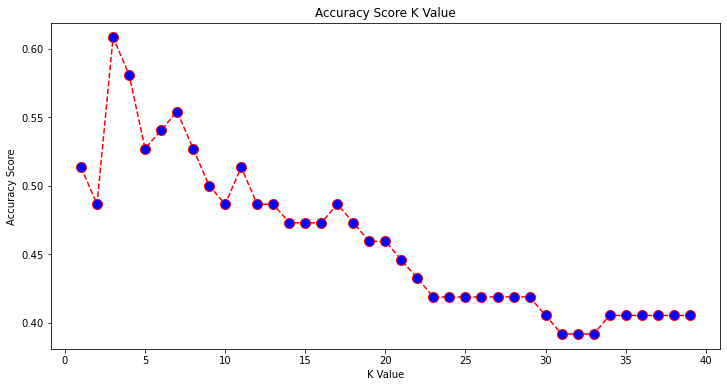

In [191]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

In [168]:
#we see that highest accuracy is at k = 3

In [169]:
classifier3 = KNeighborsClassifier(n_neighbors=3)
classifier3.fit(x_train, y_train)
y_pred3 = classifier3.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

          -1       0.50      0.86      0.63        28
           0       0.67      0.40      0.50         5
           1       0.83      0.46      0.59        41

    accuracy                           0.61        74
   macro avg       0.66      0.57      0.58        74
weighted avg       0.69      0.61      0.60        74



In [170]:
kNN_compare_comments_test = comments_test

In [171]:
kNN_compare_comments_test['kNN Sentiment'] = y_pred3
kNN_compare_comments_test

,Unnamed: 0,Comment,Language,Sentiment,NB Sentiment,SVM Sentiment,kNN Sentiment
0,665,binabasa lang powerpoint,tlen,-1,-1,-1,-1
1,666,chill laid style teaching maayos rin chill lang,tlen,1,1,1,1
2,667,say cod fish he whale stay alive escape youre gonna good cod fish inspire st...,en,1,0,1,1
3,668,punctual professor give importance reward student complete attendance,en,1,1,1,1
4,669,joke funny not,en,0,-1,-1,0
5,670,manyak youre not pretty low grade mehn biased,tlen,-1,-1,-1,-1
6,671,follow syllabus time,en,1,1,1,-1
7,672,absent,en,-1,-1,-1,-1
8,673,parang binabasa lang yung libro nagtuturo,tl,-1,-1,-1,-1
9,674,pinapahirap lessons pag inaral youtube dali lang,tlen,-1,1,-1,-1


In [172]:
#English Results

In [173]:
en_results = comments_test[comments_test['Language'] =='en']
en_results

,Unnamed: 0,Comment,Language,Sentiment,NB Sentiment,SVM Sentiment,kNN Sentiment
2,667,say cod fish he whale stay alive escape youre gonna good cod fish inspire st...,en,1,0,1,1
3,668,punctual professor give importance reward student complete attendance,en,1,1,1,1
4,669,joke funny not,en,0,-1,-1,0
6,671,follow syllabus time,en,1,1,1,-1
7,672,absent,en,-1,-1,-1,-1
10,675,not teacher but father student,en,1,1,-1,-1
11,676,absent,en,-1,-1,-1,-1
14,679,treat respect,en,1,1,1,-1
15,680,give good time quiz excellent professor overall,en,1,1,1,1
17,682,core university visible way teach,en,1,-1,1,1


In [174]:
en_accuracy_NB = accuracy_score(en_results['Sentiment'], en_results['NB Sentiment'])
en_correctpred_NB = accuracy_score(en_results['Sentiment'], en_results['NB Sentiment'], normalize = False)
en_count=len(en_results)
print('English Classification using Naive Bayes')
print('Accuracy: ', en_accuracy_NB)
print('Number of Correct Prediction: ', en_correctpred_NB, '/', en_count)
print(classification_report(en_results['Sentiment'], en_results['NB Sentiment']))

English Classification using Naive Bayes
Accuracy:  0.7878787878787878
Number of Correct Prediction:  26 / 33
              precision    recall  f1-score   support

          -1       0.67      0.80      0.73        10
           0       0.00      0.00      0.00         2
           1       0.90      0.86      0.88        21

    accuracy                           0.79        33
   macro avg       0.52      0.55      0.54        33
weighted avg       0.77      0.79      0.78        33



In [175]:
en_accuracy_SVM = accuracy_score(en_results['Sentiment'], en_results['SVM Sentiment'])
en_correctpred_SVM = accuracy_score(en_results['Sentiment'], en_results['SVM Sentiment'], normalize = False)
en_count=len(en_results)
print('English Classification using SVM')
print('Accuracy: ', en_accuracy_SVM)
print('Number of Correct Prediction: ', en_correctpred_SVM, '/', en_count)
print(classification_report(en_results['Sentiment'], en_results['SVM Sentiment']))

English Classification using SVM
Accuracy:  0.7575757575757576
Number of Correct Prediction:  25 / 33
              precision    recall  f1-score   support

          -1       0.57      0.80      0.67        10
           0       0.00      0.00      0.00         2
           1       0.89      0.81      0.85        21

    accuracy                           0.76        33
   macro avg       0.49      0.54      0.51        33
weighted avg       0.74      0.76      0.74        33



C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
en_accuracy_kNN = accuracy_score(en_results['Sentiment'], en_results['kNN Sentiment'])
en_correctpred_kNN = accuracy_score(en_results['Sentiment'], en_results['kNN Sentiment'], normalize = False)
en_count=len(en_results)
print('English Classification using kNN')
print('Accuracy: ', en_accuracy_kNN)
print('Number of Correct Prediction: ', en_correctpred_kNN, '/', en_count)
print(classification_report(en_results['Sentiment'], en_results['kNN Sentiment']))

English Classification using kNN
Accuracy:  0.6060606060606061
Number of Correct Prediction:  20 / 33
              precision    recall  f1-score   support

          -1       0.42      0.80      0.55        10
           0       1.00      1.00      1.00         2
           1       0.83      0.48      0.61        21

    accuracy                           0.61        33
   macro avg       0.75      0.76      0.72        33
weighted avg       0.72      0.61      0.61        33



In [177]:
#Filipino Results

In [178]:
tl_results = comments_test[comments_test['Language'] =='tl']
tl_results

,Unnamed: 0,Comment,Language,Sentiment,NB Sentiment,SVM Sentiment,kNN Sentiment
8,673,parang binabasa lang yung libro nagtuturo,tl,-1,-1,-1,-1
16,681,hindi namamahiya nang estudyante,tl,1,-1,-1,-1
19,684,marunong umintindi umunawa estudyante,tl,1,-1,1,-1
26,691,palagi panararamdam palagi siyang nandiyan pagka naming nang tulong,tl,1,1,1,1
29,694,sobrang panget pagmumukha,tl,-1,1,1,-1
35,700,kontrolin yung klase sobrang gulo naming,tl,1,1,1,1
40,705,parang barkada mo lang kasi mabait madaling kaibiganin,tl,1,1,1,1
50,715,madaling mawalan pasensya,tl,-1,1,1,-1
51,716,patas magbigay grado,tl,1,1,-1,-1
54,719,maitim balat,tl,0,-1,-1,-1


In [179]:
tl_accuracy_NB = accuracy_score(tl_results['Sentiment'], tl_results['NB Sentiment'])
tl_correctpred_NB = accuracy_score(tl_results['Sentiment'], tl_results['NB Sentiment'], normalize = False)
tl_count=len(tl_results)
print('Filipino Classification using Naive Bayes')
print('Accuracy: ', tl_accuracy_NB)
print('Number of Correct Prediction: ', tl_correctpred_NB, '/', tl_count)
print(classification_report(tl_results['Sentiment'], tl_results['NB Sentiment']))

Filipino Classification using Naive Bayes
Accuracy:  0.5384615384615384
Number of Correct Prediction:  7 / 13
              precision    recall  f1-score   support

          -1       0.43      0.60      0.50         5
           0       0.00      0.00      0.00         1
           1       0.67      0.57      0.62         7

    accuracy                           0.54        13
   macro avg       0.37      0.39      0.37        13
weighted avg       0.52      0.54      0.52        13



C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [180]:
tl_accuracy_SVM = accuracy_score(tl_results['Sentiment'], tl_results['SVM Sentiment'])
tl_correctpred_SVM = accuracy_score(tl_results['Sentiment'], tl_results['SVM Sentiment'], normalize = False)
tl_count=len(tl_results)
print('Filipino Classification using SVM')
print('Accuracy: ', tl_accuracy_SVM)
print('Number of Correct Prediction: ', tl_correctpred_SVM, '/', tl_count)
print(classification_report(tl_results['Sentiment'], tl_results['SVM Sentiment']))

Filipino Classification using SVM
Accuracy:  0.5384615384615384
Number of Correct Prediction:  7 / 13
              precision    recall  f1-score   support

          -1       0.43      0.60      0.50         5
           0       0.00      0.00      0.00         1
           1       0.67      0.57      0.62         7

    accuracy                           0.54        13
   macro avg       0.37      0.39      0.37        13
weighted avg       0.52      0.54      0.52        13



C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
tl_accuracy_kNN = accuracy_score(tl_results['Sentiment'], tl_results['kNN Sentiment'])
tl_correctpred_kNN = accuracy_score(tl_results['Sentiment'], tl_results['kNN Sentiment'], normalize = False)
tl_count=len(tl_results)
print('Filipino Classification using kNN')
print('Accuracy: ', tl_accuracy_kNN)
print('Number of Correct Prediction: ', tl_correctpred_kNN, '/', tl_count)
print(classification_report(tl_results['Sentiment'], tl_results['kNN Sentiment']))

Filipino Classification using kNN
Accuracy:  0.6153846153846154
Number of Correct Prediction:  8 / 13
              precision    recall  f1-score   support

          -1       0.50      1.00      0.67         5
           0       0.00      0.00      0.00         1
           1       1.00      0.43      0.60         7

    accuracy                           0.62        13
   macro avg       0.50      0.48      0.42        13
weighted avg       0.73      0.62      0.58        13



C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [182]:
#Taglish Results

In [183]:
tlen_results = comments_test[comments_test['Language'] =='tlen']
tlen_results

,Unnamed: 0,Comment,Language,Sentiment,NB Sentiment,SVM Sentiment,kNN Sentiment
0,665,binabasa lang powerpoint,tlen,-1,-1,-1,-1
1,666,chill laid style teaching maayos rin chill lang,tlen,1,1,1,1
5,670,manyak youre not pretty low grade mehn biased,tlen,-1,-1,-1,-1
9,674,pinapahirap lessons pag inaral youtube dali lang,tlen,-1,1,-1,-1
12,677,maganda gamit visuals,tlen,1,1,1,1
13,678,di naniniwala kasi di nagsasabi totoo,tlen,-1,-1,-1,-1
21,686,palaging absent,tlen,-1,-1,-1,-1
24,689,yung website lang yung teacher naming kasi dun nirerefer,tlen,-1,-1,-1,1
25,690,wala book diniscuss yung nasa exams nakuha ata moon joke,tlen,-1,-1,-1,-1
27,692,prof namemersonal bumabawi sobrang hirap exam pagbibigay super baban grades,tlen,-1,-1,1,-1


In [184]:
tlen_accuracy_NB = accuracy_score(tlen_results['Sentiment'], tlen_results['NB Sentiment'])
tlen_correctpred_NB = accuracy_score(tlen_results['Sentiment'], tlen_results['NB Sentiment'], normalize = False)
tlen_count=len(tlen_results)
print('Taglish Classification using Naive Bayes')
print('Accuracy: ', tlen_accuracy_NB)
print('Number of Correct Prediction: ', tlen_correctpred_NB, '/', tlen_count)
print(classification_report(tlen_results['Sentiment'], tlen_results['NB Sentiment']))

Taglish Classification using Naive Bayes
Accuracy:  0.6785714285714286
Number of Correct Prediction:  19 / 28
              precision    recall  f1-score   support

          -1       0.71      0.77      0.74        13
           0       0.00      0.00      0.00         2
           1       0.69      0.69      0.69        13

    accuracy                           0.68        28
   macro avg       0.47      0.49      0.48        28
weighted avg       0.65      0.68      0.67        28



In [185]:
tlen_accuracy_SVM = accuracy_score(tlen_results['Sentiment'], tlen_results['SVM Sentiment'])
tlen_correctpred_SVM = accuracy_score(tlen_results['Sentiment'], tlen_results['SVM Sentiment'], normalize = False)
tlen_count=len(tlen_results)
print('Taglish Classification using SVM')
print('Accuracy: ', tlen_accuracy_SVM)
print('Number of Correct Prediction: ', tlen_correctpred_SVM, '/', tlen_count)
print(classification_report(tlen_results['Sentiment'], tlen_results['SVM Sentiment']))

Taglish Classification using SVM
Accuracy:  0.6785714285714286
Number of Correct Prediction:  19 / 28
              precision    recall  f1-score   support

          -1       0.67      0.77      0.71        13
           0       0.00      0.00      0.00         2
           1       0.69      0.69      0.69        13

    accuracy                           0.68        28
   macro avg       0.45      0.49      0.47        28
weighted avg       0.63      0.68      0.65        28



C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\giorgio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:
tlen_accuracy_kNN = accuracy_score(tlen_results['Sentiment'], tlen_results['kNN Sentiment'])
tlen_correctpred_kNN = accuracy_score(tlen_results['Sentiment'], tlen_results['kNN Sentiment'], normalize = False)
tlen_count=len(tlen_results)
print('Taglish Classification using kNN')
print('Accuracy: ', tlen_accuracy_kNN)
print('Number of Correct Prediction: ', tlen_correctpred_kNN, '/', tlen_count)
print(classification_report(tlen_results['Sentiment'], tlen_results['kNN Sentiment']))

Taglish Classification using kNN
Accuracy:  0.6071428571428571
Number of Correct Prediction:  17 / 28
              precision    recall  f1-score   support

          -1       0.58      0.85      0.69        13
           0       0.00      0.00      0.00         2
           1       0.75      0.46      0.57        13

    accuracy                           0.61        28
   macro avg       0.44      0.44      0.42        28
weighted avg       0.62      0.61      0.58        28

